Text(0.5, 1.0, 'b. Valeurs singulières')

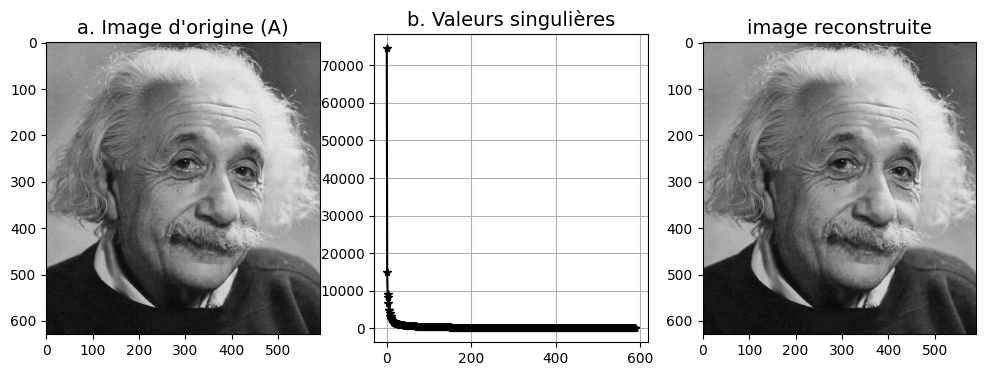

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as alg

A = plt.imread('einstein.jpg')
A = A[ :, :,1]

plt.figure(1,figsize=(12, 4))
plt.subplot(131)
plt.imshow(A, cmap='gray')
plt.title("a. Image d'origine (A)", fontsize=14)

A = A.astype(dtype = float)
U, S, Vt = alg.svd(A)

A_p = np.zeros_like(A , dtype=float)
for k in range(len(S)-1):
    A_p += U[:,k:k+1] @ (S[k] * Vt[k:k+1,:])

plt.subplot(133)
plt.imshow(A_p, cmap='gray')
plt.title("c. image reconstruite", fontsize=14)


plt.subplot(132)
plt.plot(S, '*k-')
plt.grid(True)
plt.title("b. Valeurs singulières", fontsize=14)

Text(0.5, 0.98, "Approximations de l'image avec différentes valeurs de k")

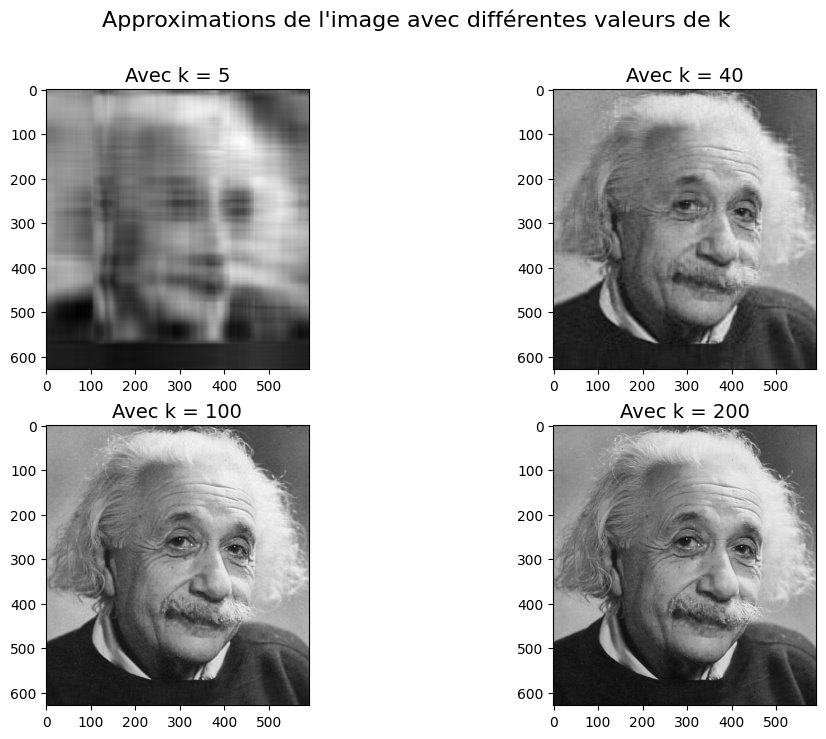

In [22]:
k_values = [5, 40, 100, 200]
plt.figure(figsize=(12, 8))
A_k = np.zeros_like(A , dtype=float)
for i, k in enumerate(k_values):
    for j in range(k):
        A_k += U[:,j:j+1] @ (S[j] * Vt[j:j+1,:])
    plt.subplot(2, 2, i + 1)
    plt.imshow(A_k, cmap='gray')
    plt.title(f"Avec k = {k}", fontsize=14)
    A_k = np.zeros_like(A , dtype=float)
plt.suptitle("Approximations de l'image avec différentes valeurs de k", fontsize=16)

Les Uk contiennent m x k éléments plus les k valeurs singulières plus les k x n éléments des Vk. Il y a donc m⋅k+k+k⋅n informations à transmettre donc un taux de compression de τ=1−(m⋅k+k+k⋅n)/m⋅n.

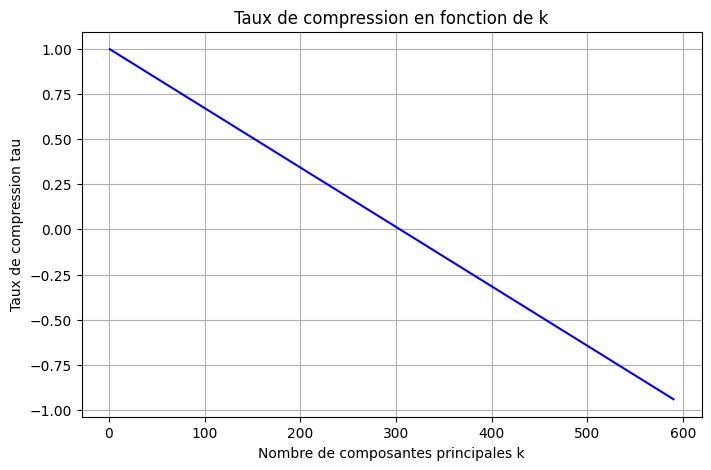

In [20]:
m, n = A.shape
valeurs_k = range(1, min(m, n) + 1)
taux_compression = []
for k in valeurs_k:
    info_transmises = m * k + k + k * n
    taux = 1 - (info_transmises / (m * n))
    taux_compression.append(taux)
plt.figure(figsize=(8, 5))
plt.plot(valeurs_k, taux_compression, '-b', label="Taux de compression tau")
plt.xlabel("Nombre de composantes principales k")
plt.ylabel("Taux de compression tau")
plt.title("Taux de compression en fonction de k")
plt.grid()